In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='count', ylabel='Exited'>

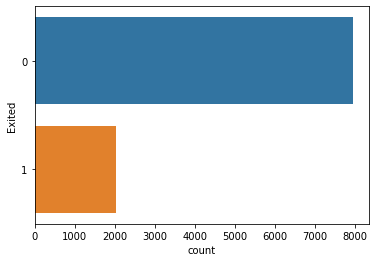

In [ ]:
sns.countplot(y='Gender',data=df)


<AxesSubplot:xlabel='Gender', ylabel='Geography'>

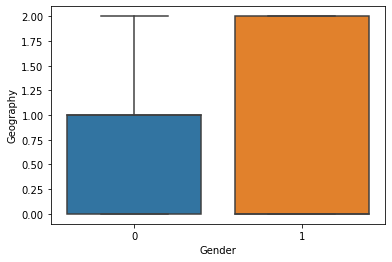

In [ ]:
sns.boxplot(x='Gender', y='Geography', data=df)

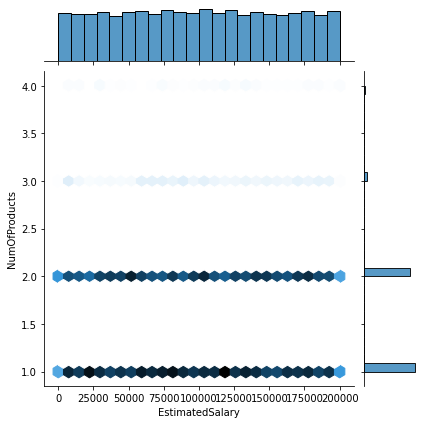

In [ ]:
sns.jointplot(x = "EstimatedSalary", y = "NumOfProducts",
              kind = "hex",data=df)

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_test=scaler.transform(x_test)
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2694,628,1,1,29,3,113146.98,2,0,1,124749.08
5140,626,0,0,29,4,105767.28,2,0,0,41104.82
2568,612,1,0,47,6,130024.87,1,1,1,45750.21
3671,646,1,0,52,6,111739.40,2,0,1,68367.18
7427,714,2,1,33,8,122017.19,1,0,0,162515.17
...,...,...,...,...,...,...,...,...,...,...
2895,621,1,1,47,7,107363.29,1,1,1,66799.28
7813,684,1,0,63,3,81245.79,1,1,0,69643.31
905,672,0,0,45,9,0.00,1,1,1,92027.69
5192,663,0,0,39,8,0.00,2,1,1,101168.90


In [ ]:
import tensorflow as tf
ann=tf.keras.models.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
800/800 [==============================] - 6s 6ms/step - loss: 688.8148 - accuracy: 0.6668
Epoch 2/100
800/800 [==============================] - 6s 8ms/step - loss: 76.9328 - accuracy: 0.6889
Epoch 3/100
800/800 [==============================] - 4s 5ms/step - loss: 78.5723 - accuracy: 0.6858
Epoch 4/100
800/800 [==============================] - 4s 5ms/step - loss: 69.9804 - accuracy: 0.6909
Epoch 5/100
800/800 [==============================] - 4s 5ms/step - loss: 65.7527 - accuracy: 0.6908
Epoch 6/100
800/800 [==============================] - 5s 7ms/step - loss: 71.3450 - accuracy: 0.6909
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 66.6793 - accuracy: 0.6892
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 63.2920 - accuracy: 0.6867
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 54.0837 - accuracy: 0.6920
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 63.40

In [ ]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (10, 12)                  132       
                                                                 
 dense_7 (Dense)             (10, 12)                  156       
                                                                 
 dense_8 (Dense)             (10, 1)                   13        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred=ann.predict(scaler.transform([[619,0,0,42,2,0.00,1,1,1,101348.88]]))
if(pred>0.5):
  print(1)
else:
  print(0)

1/1 [==============================] - 0s 102ms/step
0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
